<a href="https://colab.research.google.com/github/faganvaliyev/ML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X,y = mnist['data'],mnist['target']
X[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
X.shape,y.shape

((70000, 784), (70000,))

(-0.5, 27.5, 27.5, -0.5)

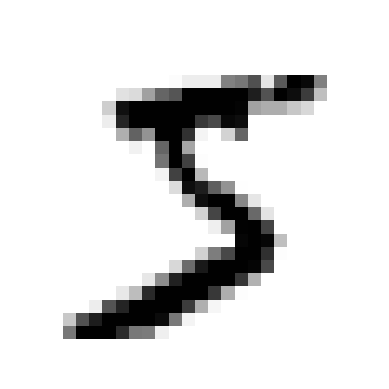

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(X[0].reshape(28,28),cmap = 'binary')
plt.axis('off')

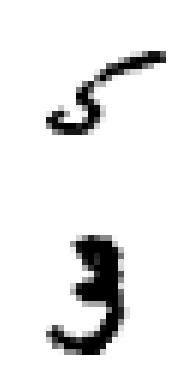

In [ ]:
def digit_image(digit):
  plt.imshow(digit.reshape(28,28),cmap = 'binary')
  plt.axis('off')
plt.subplot(2,1,1)
digit_image(X[11])
plt.subplot(2,1,2)
digit_image
digit_image(X[10])

In [ ]:
a = ['A','B','C']
for idx ,item in enumerate(a):
   print(idx,item)

0 A
1 B
2 C


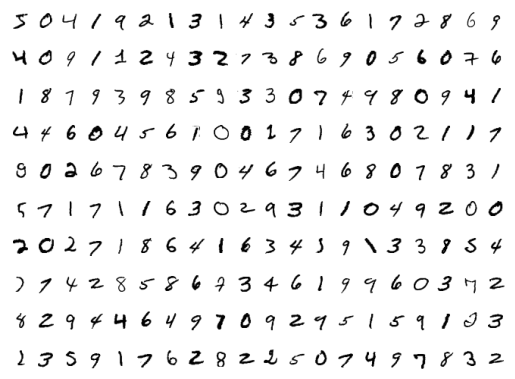

In [ ]:
for idx, image in enumerate(X[:200]):
  plt.subplot(10,20,idx+1)
  digit_image(X[idx])

In [ ]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test =  y[60000:]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.score(X_train,y_train_5)

0.9522666666666667

In [ ]:
sgd_clf.score(X_test,y_test_5)

0.9492

In [ ]:
any([False,True,False])

True

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
dummy_clf.score(X_test,y_test_5)

0.9108

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
# precision and recall

from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [ ]:
# from sklearn.model_selection import f1_score

some_digit=X[0]
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [ ]:
thresold = 0
y_somedigit_pred = (y_score>thresold)
y_somedigit_pred

array([ True])

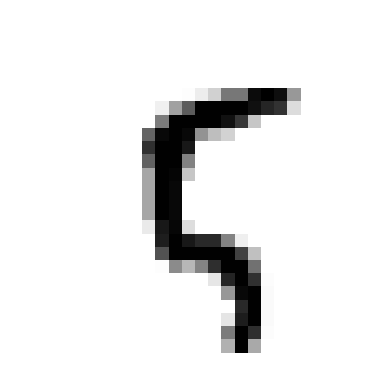

In [ ]:
some_digit=X[100]
digit_image(X[100])

In [ ]:
thresold = 3000
y_somedigit_pred = (y_score>thresold)
y_somedigit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                             method = 'decision_function')


In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,tresholds = precision_recall_curve(y_train_5,y_scores)

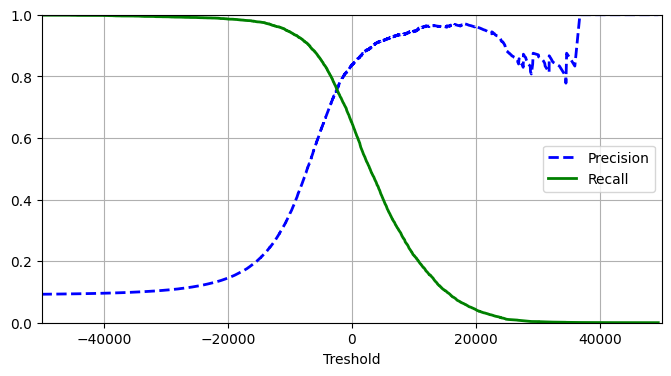

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(tresholds,precisions[:-1],'b--',label = 'Precision',linewidth = 2)
plt.plot(tresholds,recalls[:-1],'g-',label= 'Recall',linewidth = 2)

plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Treshold')
plt.legend(loc = 'center right')

In [ ]:
precisions[0],recalls[0],tresholds[0]

(0.09035, 1.0, -146348.56726173862)

In [ ]:
idx_for_90_precision = (precisions>=0.9).argmax() #argmax()-boyuk reqemin indeksi
idx_for_90_precision

57109

In [ ]:
recalls[idx_for_90_precision]

0.4799852425751706

In [ ]:
tresholds_for_90_precison = tresholds[idx_for_90_precision]

tresholds_for_90_precison

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores>=tresholds_for_90_precison)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=2,
                                    method = 'predict_proba')


In [ ]:
y_probas_forest[-10:]

array([[0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.05, 0.95],
       [0.98, 0.02],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.91, 0.09],
       [0.9 , 0.1 ]])

In [ ]:
y_probas_forest[:2][:,1]

array([0.8, 0. ])

In [ ]:
y_scores_forest = y_probas_forest[:,1]

precisions_forest,recalls_forest,tresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

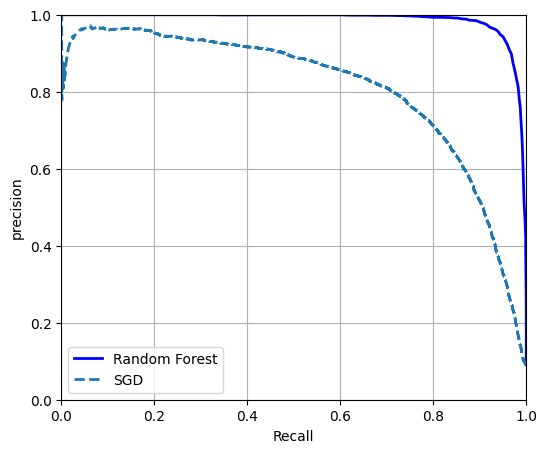

In [ ]:
plt.figure(figsize=(6,5))

plt.plot(recalls_forest,precisions_forest,'b-',linewidth = 2,label='Random Forest')
plt.plot(recalls,precisions,'--',linewidth = 2,label='SGD')

plt.xlabel("Recall")
plt.ylabel("precision")
plt.axis([0,1,0,1])
plt.grid()
plt.legend(loc='lower left')

In [ ]:
idx_for_90_precision_forest = (precisions_forest>=0.9).argmax()
idx_for_90_precision_forest

25

In [ ]:
recalls[idx_for_90_precision_forest]

1.0

In [ ]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5,y_train_pred_forest)

0.9186035011373751

In [ ]:
precision_score(y_train_5,y_train_pred_forest)

0.9901918976545843

In [ ]:
recall_score(y_train_5,y_train_pred_forest)

0.8566685113447703

# Multiclass Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)
forest_clf.score(X_test,y_test)

0.9705

In [ ]:
from sklearn.svm import SVC #default only for binary classification
svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
# ovr|ova - one versus rest/all
# ovo - one versus one

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[-0.26,  0.75,  3.86,  2.74,  7.12,  9.3 ,  6.09,  1.74,  5.1 ,
         8.27]])

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[-0.11, -0.4 , -0.09, -0.48, -1.07, -0.31, -0.09, -0.25, -0.63,
        -0.16, -0.08, -0.33, -1.  , -0.42, -0.21, -0.4 , -0.68,  0.4 ,
        -0.25, -1.  , -0.13,  0.24, -0.13, -0.39, -0.44, -1.24, -0.34,
         0.18, -0.63, -0.69, -0.9 ,  0.1 ,  0.52,  0.13, -0.77,  0.81,
         1.  ,  1.  ,  0.71,  0.22,  0.25, -0.37, -0.53, -1.15, -0.15]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array(['8'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-28526., -15241.,  -6675.,  -7354.,  -8761.,   -348., -12777.,
        -11494.,    631.,  -1012.]])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [ ]:
X_test_scaled = scaler.transform(X_test.astype("float64"))
sgd_clf.fit(X_test,y_test)

SGDClassifier(random_state=42)

#Error Analysis

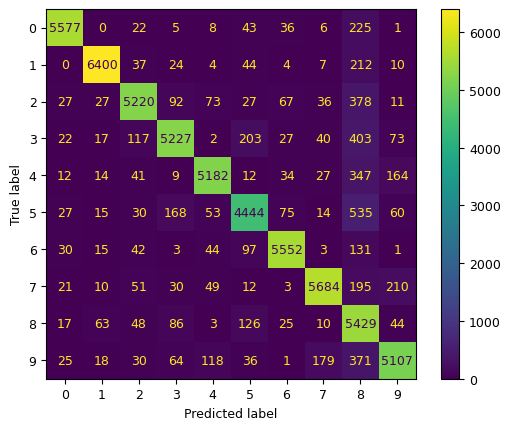

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv = 3)
plt.rc('font',size = 9)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

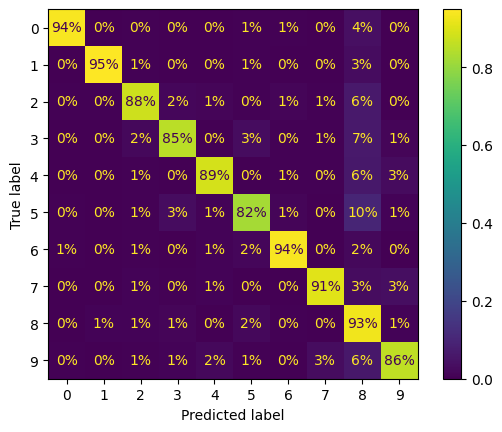

In [ ]:
plt.rc('font',size = 10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')
plt.show()

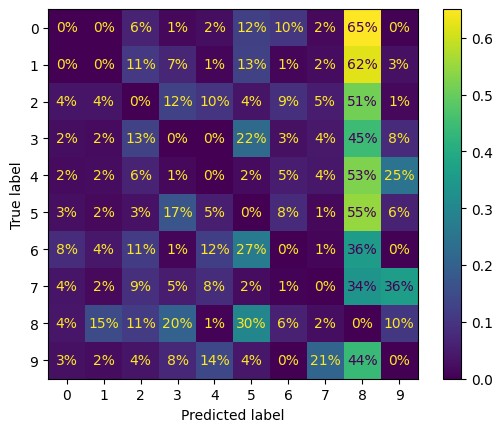

In [ ]:
sample_weight = (y_train_pred!=y_train)
plt.rc('font',size=10)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,sample_weight=sample_weight,normalize='true',values_format='.0%')
plt.show()

In [ ]:
cl_a,cl_b='3','5'
X_aa=X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b) & (y_train_pred==cl_b)]

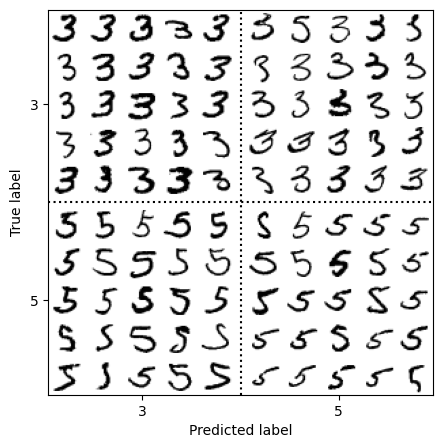

In [ ]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#Multioutput Classification

In [ ]:
np.random.seed(42)
noise=np.random.randint(0,100,(len(X_train),784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

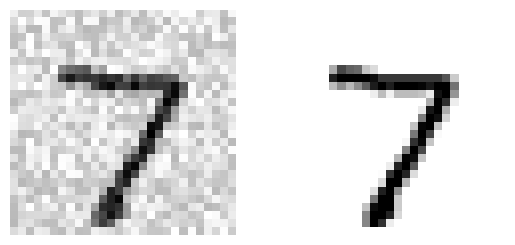

In [ ]:
plt.subplot(121);digit_image(X_test_mod[0])
plt.subplot(122);digit_image(y_test_mod[0])
plt.show()

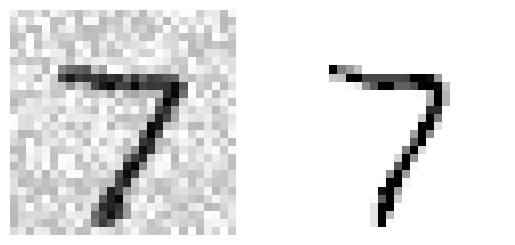

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([X_test_mod[0]])
plt.subplot(121);digit_image(X_test_mod[0])
plt.subplot(122);digit_image(clean_digit)
plt.show()